In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy_financial as npf

In [2]:
data = pd.read_excel("Junior Data Analyst _ Data.xlsx")

In [3]:
# drop first row
data = data.iloc[1:, :]
#reset index values
data.reset_index(drop=True, inplace=True)

In [4]:
#set column names equal to values in row index position 0
data.columns = data.iloc[0]

#remove first row from DataFrame
data = data[1:]

In [5]:
data.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
1,0,2020-01-01 00:00:00,0,1.50985
2,1,2020-01-01 01:00:00,0,1.41186
3,2,2020-01-01 02:00:00,0,1.0239
4,3,2020-01-01 03:00:00,0,0.642
5,4,2020-01-01 04:00:00,0,0.96


In [6]:
#resonable checks
data["Solar electricity generation (kWh)"] = np.where((data["Solar electricity generation (kWh)"] > 0) &
                                                      (data["Hour"] <= 5) ,np.nan , data["Solar electricity generation (kWh)"])
data["Solar electricity generation (kWh)"] = np.where((data["Solar electricity generation (kWh)"] > 0) &
                                                      (data["Hour"] >= 18 ) ,np.nan , data["Solar electricity generation (kWh)"])
data["Electricity usage (kWh)"] = np.where((data["Electricity usage (kWh)"] < 0) |
                                           (data["Electricity usage (kWh)"] >= 70 ),np.nan , data["Electricity usage (kWh)"])

In [7]:
#convert datatypes
data[["Solar electricity generation (kWh)", "Electricity usage (kWh)"]] = data[["Solar electricity generation (kWh)", "Electricity usage (kWh)"]].apply(pd.to_numeric)

In [8]:
#electricity required to be bought
data["Electricity required to be bought without battery (kWh)"] = data["Electricity usage (kWh)"] - data["Solar electricity generation (kWh)"]
data["Electricity required to be bought without battery (kWh)"] = np.where((data["Electricity required to be bought without battery (kWh)"] < 0) ,0 , data["Electricity required to be bought without battery (kWh)"])

In [9]:
#excess solar generated
data["Excess solar generation (kWh)"] = data["Solar electricity generation (kWh)"] - data["Electricity usage (kWh)"]
data["Excess solar generation (kWh)"] = np.where((data["Excess solar generation (kWh)"] < 0) ,0 , data["Excess solar generation (kWh)"])

In [10]:
#battery charge level
data["Battery charge level (kWh)"] = data["Excess solar generation (kWh)"].cumsum()
data["Battery charge level (kWh)"] = np.where((data["Battery charge level (kWh)"] > 12.5) ,12.5 , data["Battery charge level (kWh)"])

In [11]:
#electricity required to be bought with battery
data["Electricity required to be bought with battery (kWh)"] = data["Electricity usage (kWh)"] - data["Solar electricity generation (kWh)"] - data["Battery charge level (kWh)"]
data["Electricity required to be bought with battery (kWh)"] = np.where((data["Electricity required to be bought with battery (kWh)"] < 0) ,0 , data["Electricity required to be bought with battery (kWh)"])

In [12]:
data["Month"] = data["Date/hour start"].dt.strftime('%B')

In [13]:
data.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Electricity required to be bought without battery (kWh),Excess solar generation (kWh),Battery charge level (kWh),Electricity required to be bought with battery (kWh),Month
1,0,2020-01-01 00:00:00,0.0,1.509849,1.509849,0.0,0.0,1.509849,January
2,1,2020-01-01 01:00:00,0.0,1.411859,1.411859,0.0,0.0,1.411859,January
3,2,2020-01-01 02:00:00,0.0,1.023898,1.023898,0.0,0.0,1.023898,January
4,3,2020-01-01 03:00:00,0.0,0.642000,0.642000,0.0,0.0,0.642000,January
5,4,2020-01-01 04:00:00,0.0,0.960000,0.960000,0.0,0.0,0.960000,January


In [14]:
# total cost savings in 2020
savings = (data["Electricity required to be bought without battery (kWh)"].sum()*0.17) - (data["Electricity required to be bought with battery (kWh)"].sum()*0.17)
print (savings)

1101.5995347100002


In [15]:
# average solar electricity generated by hour in 2020
data_avg = data.groupby(by = "Hour").mean()["Solar electricity generation (kWh)"]
data_avg.head()

Hour
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Solar electricity generation (kWh), dtype: float64

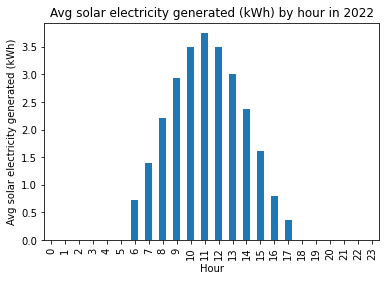

In [16]:
data_avg.plot.bar() 
plt.xlabel("Hour")
plt.ylabel("Avg solar electricity generated (kWh)")
plt.title("Avg solar electricity generated (kWh) by hour in 2022")
plt.show()

In [17]:
#tabulation of data
data_monthly = data.groupby(by = "Month", as_index = False)[["Solar electricity generation (kWh)","Electricity usage (kWh)","Electricity required to be bought without battery (kWh)","Electricity required to be bought with battery (kWh)"]].sum()
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data_monthly["Month"] = pd.Categorical(data_monthly["Month"],categories=months_in_order,ordered=True)
data_monthly = data_monthly.sort_values("Month")
data_monthly = data_monthly.reset_index(drop=True)
data_monthly

,Month,Solar electricity generation (kWh),Electricity usage (kWh),Electricity required to be bought without battery (kWh),Electricity required to be bought with battery (kWh)
0,January,264.744,1717.804181,920.477381,191.592631
1,February,447.936,1559.929310,675.839510,100.264400
2,March,577.767,1797.859450,741.156450,83.796000
3,April,892.926,1726.356487,708.254519,142.083500
4,May,1602.519,946.317809,260.694209,30.483000
5,June,1344.621,1158.995538,389.842938,34.763000
6,July,1327.470,1196.957121,418.134321,54.908000
7,August,1141.950,1491.525351,611.829351,116.191700
8,September,831.333,1622.691165,630.891165,102.015000
9,October,543.969,1420.745585,650.934185,122.900600


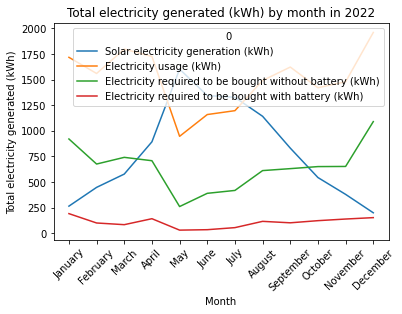

In [18]:
data_monthly.plot() 
plt.xticks(data_monthly.index,months_in_order,rotation=45)
plt.xlabel("Month")
plt.ylabel("Total electricity generated (kWh)")
plt.title("Total electricity generated (kWh) by month in 2022")
plt.show()

In [19]:
# annual savings under scenario a projection
index = list(range(0,21))
year = list(range(2022,2042))
forcast = pd.DataFrame(list(zip(index, year)),columns =["index", "year"])
forcast["price_20_a"] = 0.17*(1.04**forcast["index"])
forcast["savings_a"] = (data["Electricity required to be bought without battery (kWh)"].sum()-data["Electricity required to be bought with battery (kWh)"].sum())*forcast["price_20_a"]
print(forcast)

    index  year  price_20_a    savings_a
0       0  2022    0.170000  1101.599535
1       1  2023    0.176800  1145.663516
2       2  2024    0.183872  1191.490057
3       3  2025    0.191227  1239.149659
4       4  2026    0.198876  1288.715645
5       5  2027    0.206831  1340.264271
6       6  2028    0.215104  1393.874842
7       7  2029    0.223708  1449.629836
8       8  2030    0.232657  1507.615029
9       9  2031    0.241963  1567.919630
10     10  2032    0.251642  1630.636416
11     11  2033    0.261707  1695.861872
12     12  2034    0.272175  1763.696347
13     13  2035    0.283062  1834.244201
14     14  2036    0.294385  1907.613969
15     15  2037    0.306160  1983.918528
16     16  2038    0.318407  2063.275269
17     17  2039    0.331143  2145.806280
18     18  2040    0.344389  2231.638531
19     19  2041    0.358164  2320.904072


In [20]:
# npv under scenario a
npv_a = npf.npv(0.06,forcast["savings_a"])
print(npv_a)

18496.147760327025


In [21]:
# irr under scenario a
lst = [-7000]+list(forcast["savings_a"])
irr_a = npf.irr(lst)
print(irr_a)

0.18599720641163842


In [22]:
# annual savings under scenario b projection
prices = [0.17]
for x in index:
    prices.append(prices[x]*(1+(0.04+(0.0025*(x+1)))))
forcast["price_20_b"] = pd.Series(prices)
forcast["savings_b"] = (data["Electricity required to be bought without battery (kWh)"].sum()-data["Electricity required to be bought with battery (kWh)"].sum())*forcast["price_20_b"]
print(forcast)         

    index  year  price_20_a    savings_a  price_20_b    savings_b
0       0  2022    0.170000  1101.599535    0.170000  1101.599535
1       1  2023    0.176800  1145.663516    0.177225  1148.417515
2       2  2024    0.183872  1191.490057    0.185200  1200.096303
3       3  2025    0.191227  1239.149659    0.193997  1257.100878
4       4  2026    0.198876  1288.715645    0.203697  1319.955921
5       5  2027    0.206831  1340.264271    0.214391  1389.253607
6       6  2028    0.215104  1393.874842    0.226183  1465.662556
7       7  2029    0.223708  1449.629836    0.239188  1549.938153
8       8  2030    0.232657  1507.615029    0.253539  1642.934442
9       9  2031    0.241963  1567.919630    0.269386  1745.617844
10     10  2032    0.251642  1630.636416    0.286896  1859.083004
11     11  2033    0.261707  1695.861872    0.306261  1984.571107
12     12  2034    0.272175  1763.696347    0.327699  2123.491085
13     13  2035    0.283062  1834.244201    0.351458  2277.444188
14     14 

In [24]:
# npv under scenario b
npv_b = npf.npv(0.06,forcast["savings_b"])
print(npv_b)

21552.41592925466


In [25]:
# irr under scenario b
lst = [-7000]+list(forcast["savings_b"])
irr_b = npf.irr(lst)
print(irr_b)

0.19939085047803684
